<div style="text-align: center; background-color: #f2f2f2; padding: 15px;">
  <h1 style="color: #880808; font-size: 35px;">Doenças Cardíacas</h1>
</div>

![](https://images.hindustantimes.com/img/2022/08/24/1600x900/FaRXbp6XEAEwwpS_1661306749722_1661306764629_1661306764629.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> - O dataset não tem valores ausentes
> - Algumas colunas são do tipo categórico, então deveremos pré-processa-las posteriormente
> - **Vamos analisar os dados**

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Visualização dos Dados</h1>
</div>

In [6]:
# definindo as cores dos gráficos

colors = ['#B0B7B7', '#006D77']

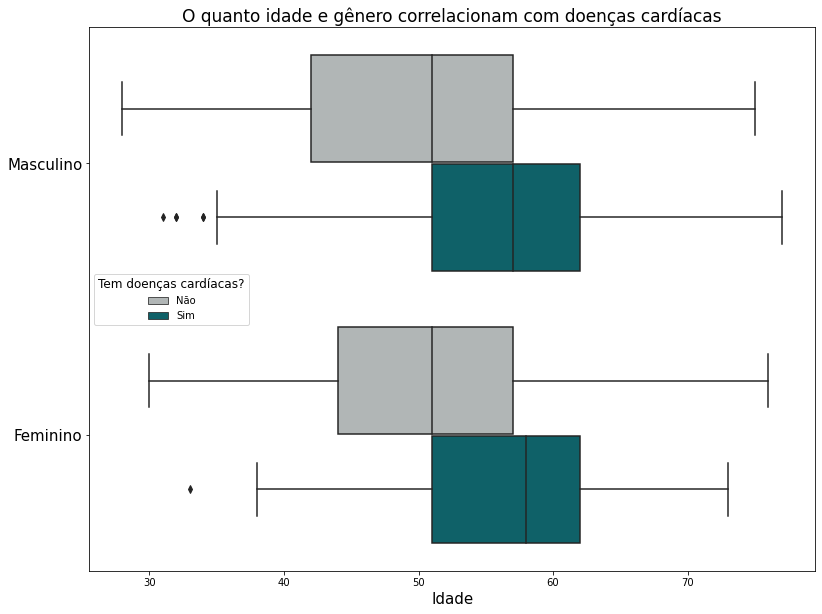

In [7]:
fig, ax = plt.subplots(figsize=(13, 10))

sns.boxplot(data=df, x='Age', y='Sex', hue='HeartDisease', ax=ax, palette=colors)

ax.set_title('O quanto idade e gênero correlacionam com doenças cardíacas', fontsize=17)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('')
ax.set_yticklabels(['Masculino', 'Feminino'])
ax.tick_params(axis='y', labelsize=15)

legend = plt.legend(loc='center left')
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')


plt.show()

> - Geralmente, pessoas mais velhas correm mais riscos de contrair doenças cardíacas.
> - O gênero não importa tanto, ambos são semelhantes em relação á contração dessa doenças.

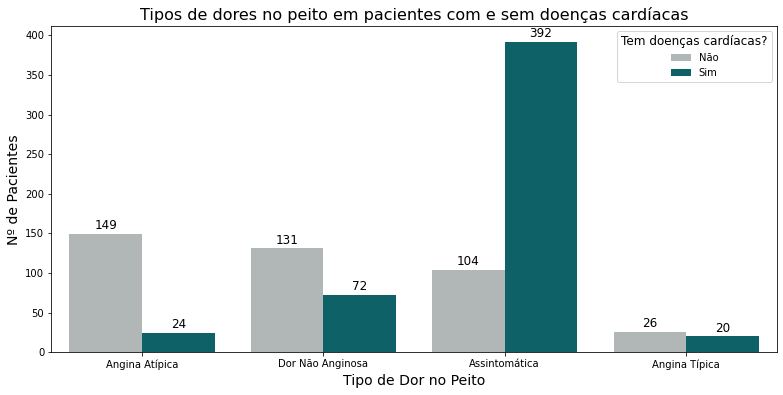

In [8]:
# ordenando os valores de cada coluna para rotular o gráfico

cpt = df.groupby(['ChestPainType', 'HeartDisease'])['HeartDisease'].count()
ordering_list = [2, 3, 4, 5, 0, 1, 5, 7]

cpt_ordering = cpt.values[ordering_list]

# fazendo o plot

fig, ax = plt.subplots(figsize=(13, 6))

sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=ax, palette=colors)

ax.set_title('Tipos de dores no peito em pacientes com e sem doenças cardíacas', fontsize=16)
ax.set_xlabel('Tipo de Dor no Peito', fontsize=14)
ax.set_ylabel('Nº de Pacientes', fontsize=14)

ax.set_xticklabels(['Angina Atípica', 'Dor Não Anginosa', 'Assintomática', 'Angina Típica'])

legend = plt.legend()
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')

for p in ax.patches:
    height = p.get_height()
    if not height:
        continue
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)


plt.show()

> - Dor no peito **nem sempre é um agravante para doenças cardíacas**, o alto valor de pessoas com doenças cardíacas e com dores do tipo assintomático nos mostra isso.

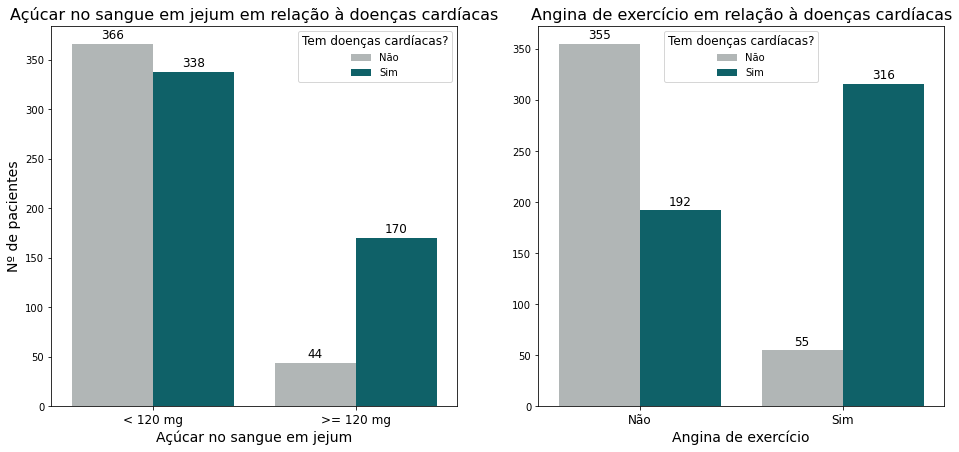

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

sns.countplot(data=df, hue='HeartDisease', x='FastingBS', ax=ax[0], palette=colors)
sns.countplot(data=df, hue='HeartDisease', x='ExerciseAngina', ax=ax[1], palette=colors)

ax[0].set_title('Açúcar no sangue em jejum em relação à doenças cardíacas', fontsize=(16))
ax[1].set_title('Angina de exercício em relação à doenças cardíacas', fontsize=(16))

ax[0].set_xlabel('Açúcar no sangue em jejum', fontsize=14)
ax[1].set_xlabel('Angina de exercício', fontsize=14)

ax[0].set_ylabel('Nº de pacientes', fontsize=14)
ax[1].set_ylabel('')

ax[0].set_xticklabels(['< 120 mg', '>= 120 mg'])
ax[1].set_xticklabels(['Não', 'Sim'])

ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

legend = ax[0].legend()
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')

legend = ax[1].legend(loc='upper center')
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')

for p in ax[0].patches:
    height = p.get_height()
    if not height:
        continue
    ax[0].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)
    
for p in ax[1].patches:
    height = p.get_height()
    if not height:
        continue
    ax[1].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)

plt.show()

> - Podemos ver que ter **120mg ou mais de açúcar em jejum no sangue pode desencadear doenças cardíacas**, mas ter menos **não impede** que você tenha essas doenças, porém há menos chances
> - Sentir angina (dor no peito) durante ou após o exercício pode ser um fator importante para desencadear doenças cardíacas.

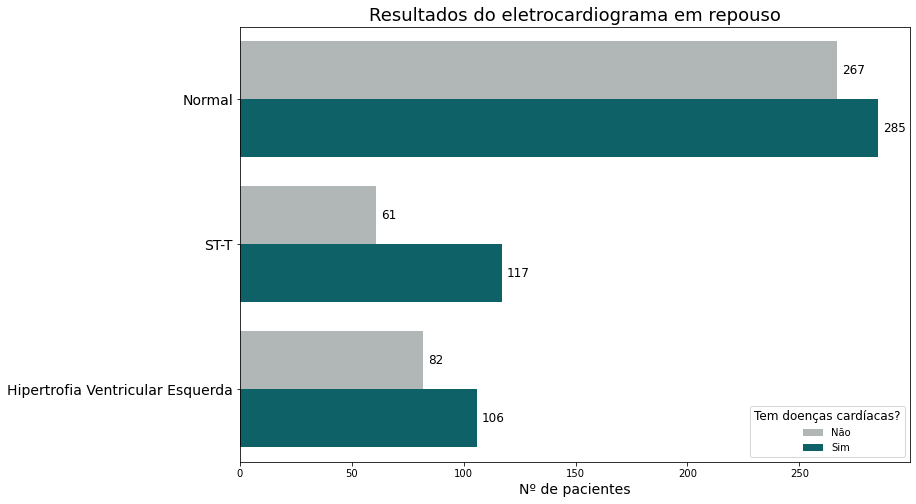

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=df, y='RestingECG', hue='HeartDisease', orient='h', ax=ax, palette=colors)

ax.set_title('Resultados do eletrocardiograma em repouso', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Nº de pacientes', fontsize=14)
ax.set_yticklabels(['Normal', 'ST-T', 'Hipertrofia Ventricular Esquerda'])
ax.tick_params(axis='y', labelsize=14)

for p in ax.patches:
    width = p.get_width()
    if not width:
        continue
    ax.annotate(str(int(width)), xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords="offset points", ha='left', va='center',
                fontsize=12)
    
legend = ax.legend()
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')

plt.show()

> - Pacientes com resultado de eletrocardiograma igual a **'Normal'** têm percentual maior que outros resultados para pessoas sem doenças cardíacas.

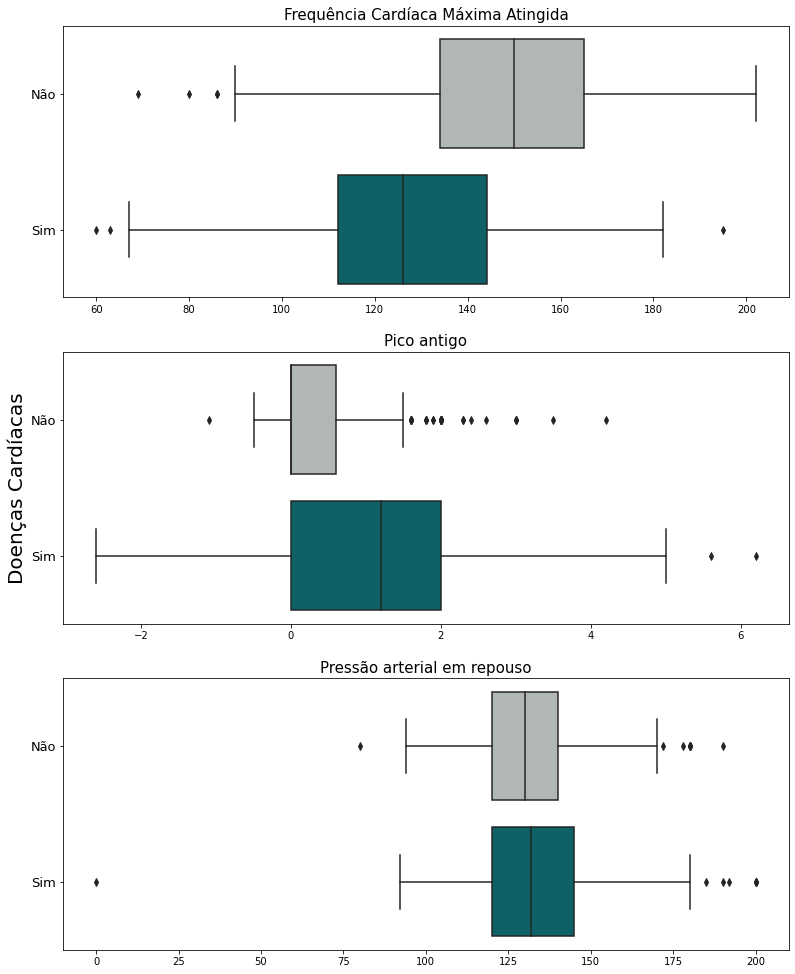

In [11]:
fig, ax = plt.subplots(nrows=3, figsize=(13, 17))

for i, val in enumerate(['MaxHR', 'Oldpeak', 'RestingBP']):
    sns.boxplot(data=df, orient='h', y='HeartDisease', x=val, ax=ax[i], palette=colors)
    ax[i].set_ylabel('')
    ax[i].set_yticklabels(['Não', 'Sim'])
    ax[i].tick_params(axis='y', labelsize=13)
    
ax[1].set_ylabel('Doenças Cardíacas', fontsize=20)

ax[0].set_title('Frequência Cardíaca Máxima Atingida', fontsize=15)
ax[1].set_title('Pico antigo', fontsize=15)
ax[2].set_title('Pressão arterial em repouso', fontsize=15)

ax[0].set_xlabel('', fontsize=15)
ax[1].set_xlabel('', fontsize=15)
ax[2].set_xlabel('', fontsize=15)
    
plt.show()

> - **A frequência cardíaca máxima alcançada influencia muito** nas chances de ter doenças cardíacas, pessoas com frequência mais baixa tendem mais do que pessoas com frequência mais alta.
> - O antigo pico de depressão do segmento ST tem uma **concentração entre 0,0 a 0,75** mais ou menos para pessoas sem doenças cardíacas.
> - A pressão arterial de repouso não parece influenciar tanto.

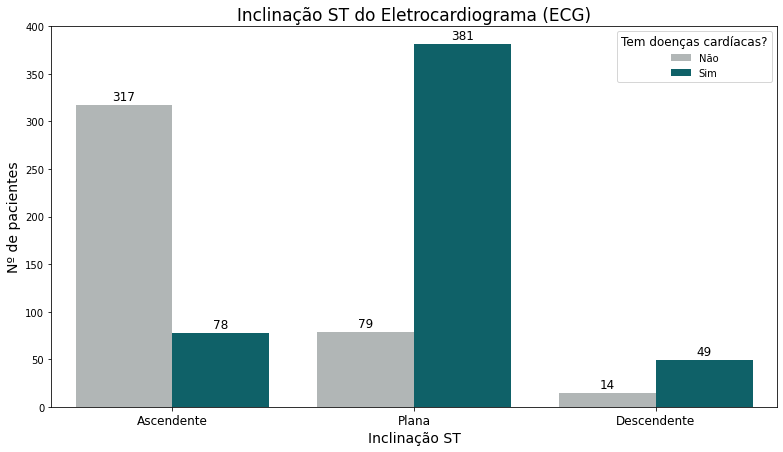

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', ax=ax, palette=colors)

for p in ax.patches:
    height = p.get_height()
    if not height:
        continue
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)

ax.set_title('Inclinação ST do Eletrocardiograma (ECG)', fontsize=17)
    
ax.set_ylabel('Nº de pacientes', fontsize=14)
ax.set_xlabel('Inclinação ST', fontsize=14)

ax.set_xticklabels(['Ascendente', 'Plana', 'Descendente'])
ax.tick_params(axis='x', labelsize=12)

legend = ax.legend()
legend.set_title('Tem doenças cardíacas?', prop={'size': 12})
legend.get_texts()[0].set_text('Não')
legend.get_texts()[1].set_text('Sim')
    
plt.show()

> - A inclinação **plana e descendente** no eletrocardiograma tem uma **influência significativa** na probabilidade de contrair doenças cardíacas, ao contrário da inclinação ascendente

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Preparação do Dados</h1>
</div>

In [13]:
# Usando OneHotEncoder

onehot = OneHotEncoder(drop='if_binary', sparse_output=False, dtype=int)

df['Sex'] = onehot.fit_transform(df.Sex.values.reshape(-1, 1))
df['ExerciseAngina'] = onehot.fit_transform(df.ExerciseAngina.values.reshape(-1, 1))

In [14]:
# Dividindo as outras colunas

df = pd.get_dummies(df)

In [15]:
# Normalzação das colunas

scaler = StandardScaler()

for col in df.drop('HeartDisease', axis=1).columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [16]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.515952,0.410909,0.825070,-0.551341,1.382928,-0.823556,-0.832432,0,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674
1,-0.478484,-1.938163,1.491752,-0.171961,-0.551341,0.754157,-0.823556,0.105664,1,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056
2,-1.751359,0.515952,-0.129513,0.770188,-0.551341,-1.525138,-0.823556,-0.832432,0,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,-0.271448,-1.002181,1.150674
3,-0.584556,-1.938163,0.302825,0.139040,-0.551341,-1.132156,1.214246,0.574711,1,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056
4,0.051881,0.515952,0.951331,-0.034755,-0.551341,-0.581981,-0.823556,-0.832432,0,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674


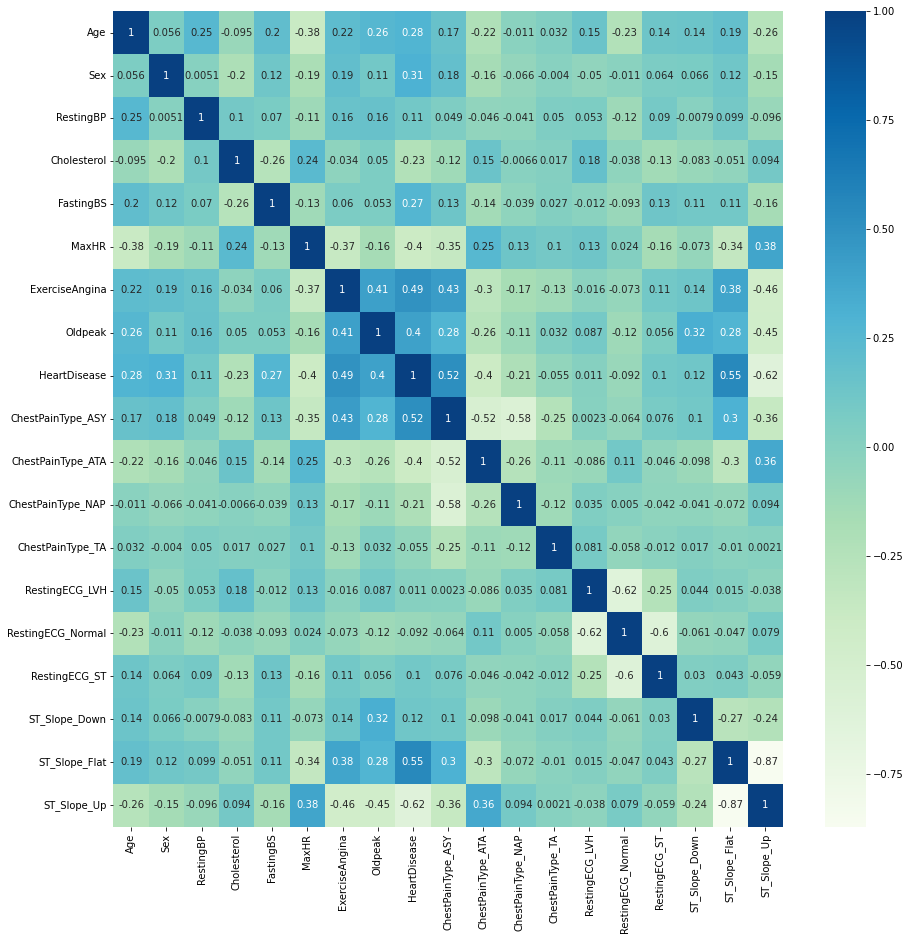

In [17]:
# correlação entre as variáveis

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='GnBu')

plt.show()

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #006D77; font-size: 25px;">Machine Learning</h1>
</div>

#### Dividindo os dados em dados de treinamento e teste para os modelos de classificação

In [18]:
X = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify=y)
X_train.shape, X_test.shape

((734, 18), (184, 18))

### Validação Cruzada

In [20]:
# modelos

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(n_estimators=50),
    'GradientBoosting': GradientBoostingClassifier()
}

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [22]:
for name, model in models.items():
    cross_result = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    
    print(f'{model}\nMean: {cross_result.mean()}\nStd: {cross_result.std()}\n')

LogisticRegression()
Mean: 0.8894534635039383
Std: 0.04137912601280913

RandomForestClassifier(n_estimators=50)
Mean: 0.8854704802480915
Std: 0.024414766419105314

GradientBoostingClassifier()
Mean: 0.8760943181607848
Std: 0.025881068258738323



> - Levando em consideração a média e o desvio padrão dos modelos, o melhor modelo foi **Random Forest**

### GridSearchCV

In [23]:
params = {
    'n_estimators': [70, 80, 90],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

<font color='red'>(!!)</font>
> - Escolher o **recall** como scoring no GridSeachCV para melhorar o recall do nosso modelo.
> - Ao fazer isso, nosso modelo favorecerá previsões corretas de **positivos negativos** (pessoas que realmente têm doenças cardíacas), evitando informações erradas sobre pessoas que tem doenças cardíacas.

In [24]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 80}

In [25]:
best_model = grid_search.best_estimator_

In [26]:
# usando o melhor modelo para prever os dados de teste

y_pred = best_model.predict(X_test)

Acurácia: 0.8967391304347826
Recall: 0.9117647058823529


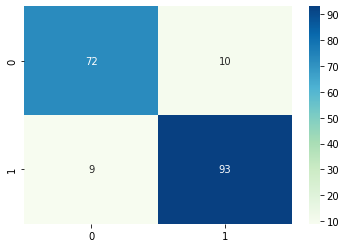

In [27]:
print(f'Acurácia: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred)}')

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='GnBu');

> - Nosso modelo teve uma **precisão de 89%**.
> - Destacando o alto **recall de 93%**, esse modelo acertou **95 de 102** novos pacientes com doença cardíaca.